In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def import_performance_metrics(subject_id):
    data = pd.read_csv(f'Performance Metrics/Subject_0{subject_id}_Performance_Metrics.csv', index_col = 0)
    return data

In [3]:
def performance_metrics(subject_id):
    dataframe = import_performance_metrics(subject_id)
    metrics_names = dataframe.columns.tolist()
    combinations = dataframe.index.tolist()
    eeg_mean_metrics = dataframe[: 1].values.tolist()[0]
    emg_mean_metrics = dataframe[1 : 2].values.tolist()[0]
    sc_mean_metrics = dataframe[2 : 3].values.tolist()[0]
    acc_mean_metrics = dataframe[3 : 4].values.tolist()[0]
    eeg_emg_mean_metrics = dataframe[4 : 5].values.tolist()[0]
    eeg_sc_mean_metrics = dataframe[5 : 6].values.tolist()[0]
    eeg_acc_mean_metrics = dataframe[6 : 7].values.tolist()[0]
    emg_sc_mean_metrics = dataframe[7 : 8].values.tolist()[0]
    emg_acc_mean_metrics = dataframe[8 : 9].values.tolist()[0]
    sc_acc_mean_metrics = dataframe[9 : 10].values.tolist()[0]
    eeg_emg_sc_mean_metrics = dataframe[10 : 11].values.tolist()[0]
    eeg_emg_acc_mean_metrics = dataframe[11 : 12].values.tolist()[0]
    eeg_sc_acc_mean_metrics = dataframe[12 : 13].values.tolist()[0]
    emg_sc_acc_mean_metrics = dataframe[13 : 14].values.tolist()[0]
    eeg_emg_sc_acc_mean_metrics = dataframe[14 : 15].values.tolist()[0]
    eeg_emg_sc_acc_mean_metrics_imp = dataframe[15 :].values.tolist()[0]

    metrics = [eeg_mean_metrics, emg_mean_metrics, sc_mean_metrics, acc_mean_metrics, eeg_emg_mean_metrics, eeg_sc_mean_metrics,
           eeg_acc_mean_metrics, emg_sc_mean_metrics, emg_acc_mean_metrics, sc_acc_mean_metrics, eeg_emg_sc_mean_metrics, 
           eeg_emg_acc_mean_metrics, eeg_sc_acc_mean_metrics, emg_sc_acc_mean_metrics, eeg_emg_sc_acc_mean_metrics, 
           eeg_emg_sc_acc_mean_metrics_imp]

    return metrics, combinations, metrics_names

In [4]:
def plot(subject_id):
    metrics, combinations, metrics_names = performance_metrics(subject_id)
    
    bar_width = 0.05
    x = np.arange(len(metrics_names))

    fig, ax = plt.subplots(figsize = (18, 5))

    for i, combination in enumerate(combinations):
        ax.bar(x + i * bar_width, metrics[i], label = combination, width = bar_width, zorder = 2)
    
    ax.set_xticks(x + (len(metrics_names) - 1) * bar_width / 2)
    ax.set_xticklabels(metrics_names)
    ax.set_title(f'Evaluation Indicator - Subject_0{subject_id}')
    ax.legend(loc='upper center', bbox_to_anchor = (0.5, -0.15), ncol = 5)
    ax.grid(axis = 'y', color = 'black', linestyle = '--', zorder = 1)

    plt.show()

In [5]:
def plot_list_of_subjects(list_of_subject_ids):
    
    metrics_1, combinations, metrics_names = performance_metrics(list_of_subject_ids[0])
    metrics_3, combinations, metrics_names = performance_metrics(list_of_subject_ids[1])
    metrics_4, combinations, metrics_names = performance_metrics(list_of_subject_ids[2])
    metrics_6, combinations, metrics_names = performance_metrics(list_of_subject_ids[3])

    metrics_mean = []
    metrics_std = []
    for idx in range(16):
        mean_metrics = np.mean([metrics_1[idx], metrics_3[idx], metrics_4[idx], metrics_6[idx]], axis = 0)
        std_metrics = np.std([metrics_1[idx], metrics_3[idx], metrics_4[idx], metrics_6[idx]], axis = 0)
        metrics_mean.append(mean_metrics)
        metrics_std.append(std_metrics)

    bar_width = 0.05
    x = np.arange(len(metrics_names))

    fig, ax = plt.subplots(figsize = (18, 5))

    for i, combination in enumerate(combinations):
        ax.bar(x + i * bar_width, metrics_mean[i], yerr = metrics_std[i], label = combination, width = bar_width, zorder = 2)
    
    ax.set_xticks(x + (len(metrics_names) - 1) * bar_width / 2)
    ax.set_xticklabels(metrics_names)
    ax.set_title('Evaluation Indicator - All Subjects')
    ax.legend(loc='upper center', bbox_to_anchor = (0.5, -0.15), ncol = 5)
    ax.grid(axis = 'y', color = 'black', linestyle = '--', zorder = 1)

    plt.show()

In [6]:
list_of_subjects = [1, 3, 4, 6]

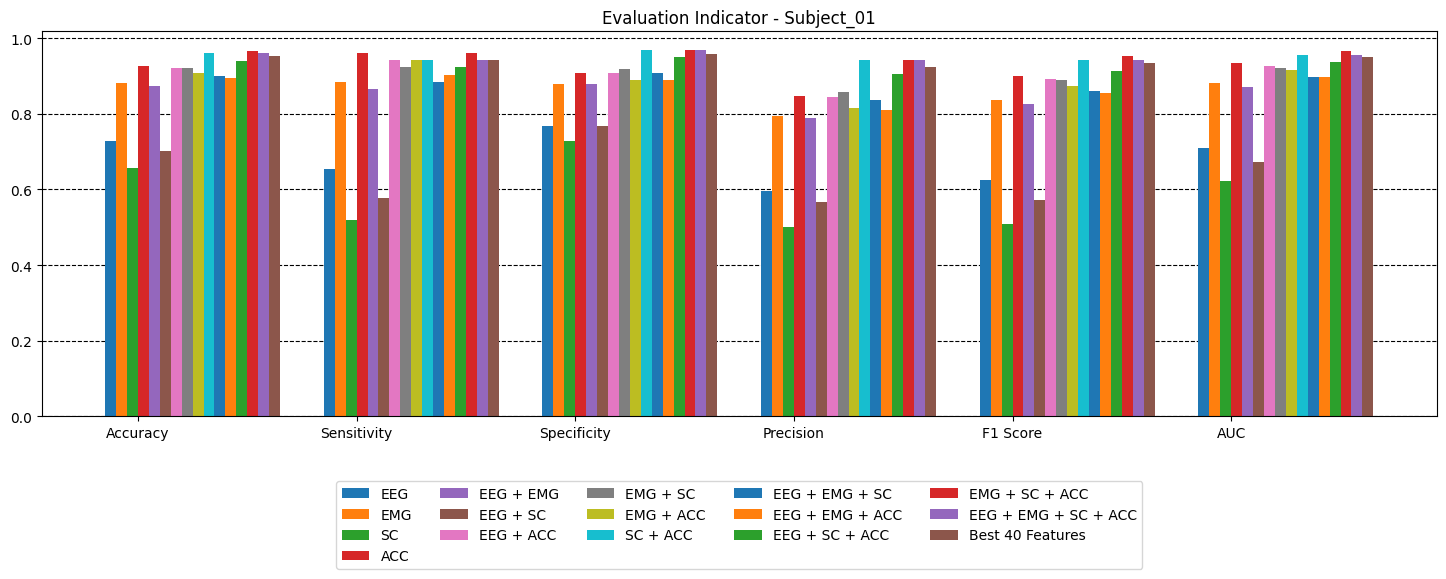

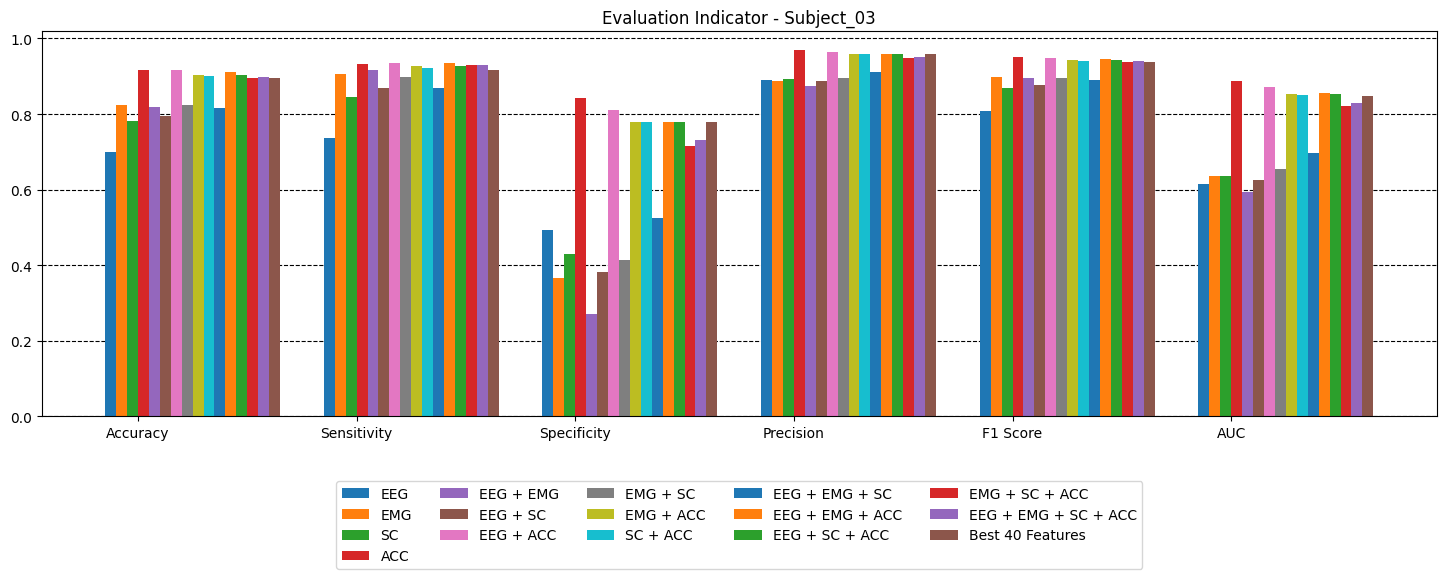

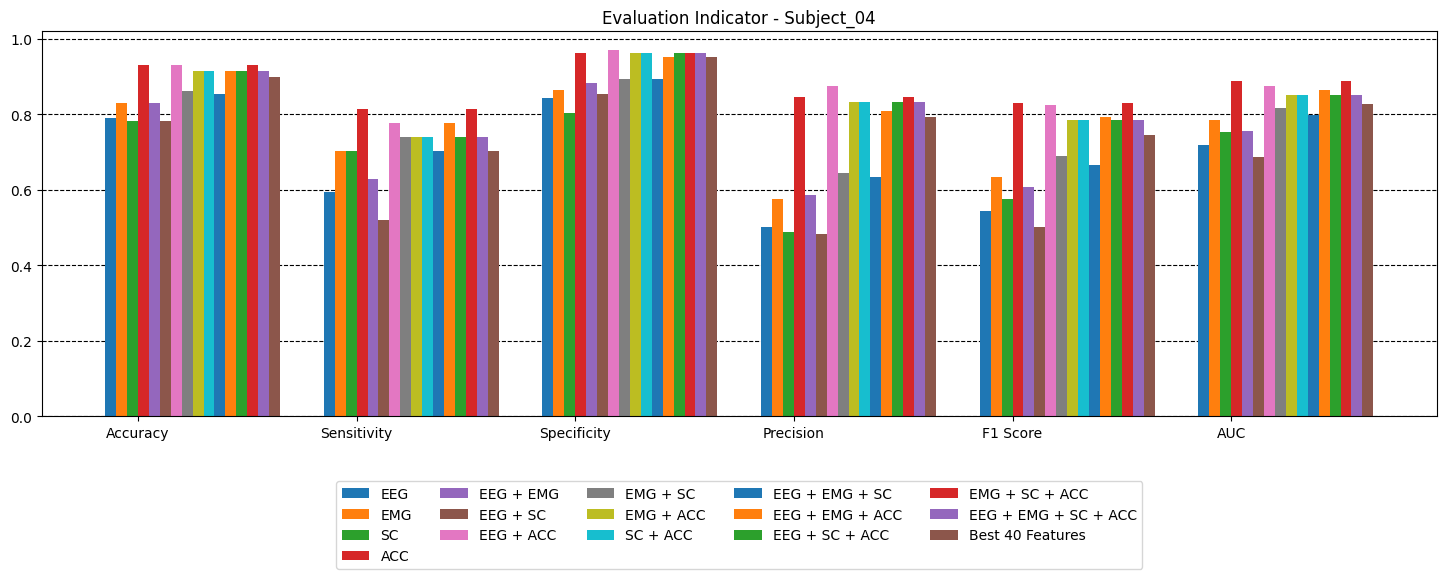

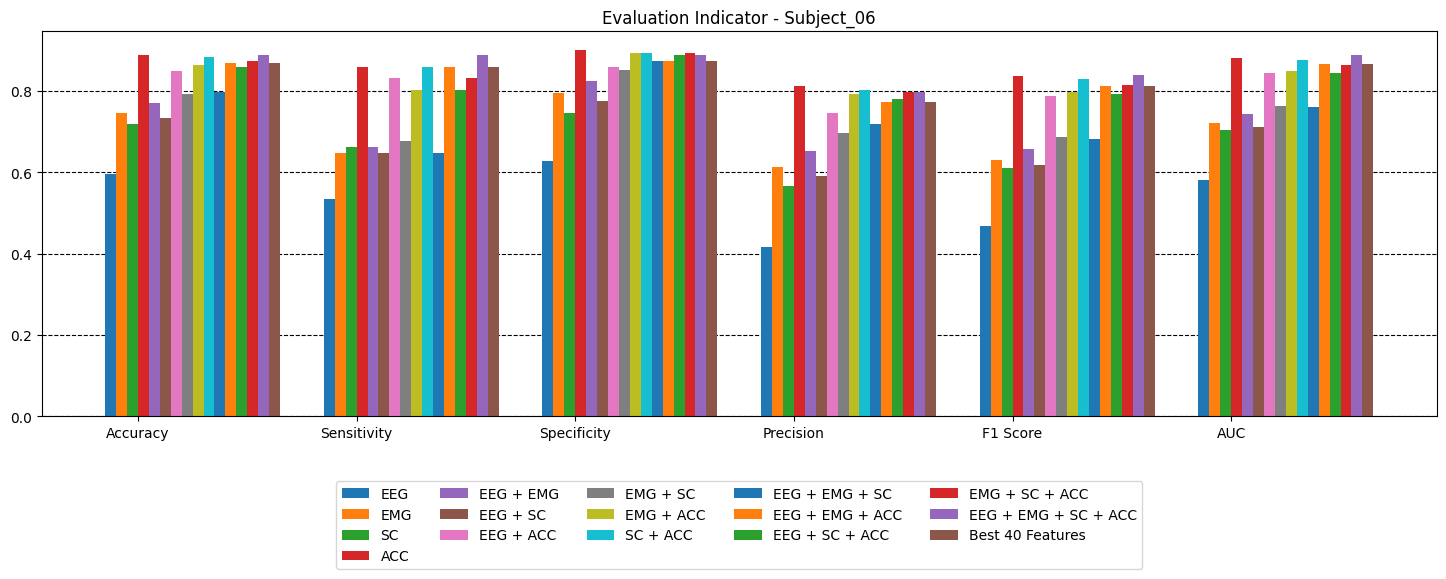

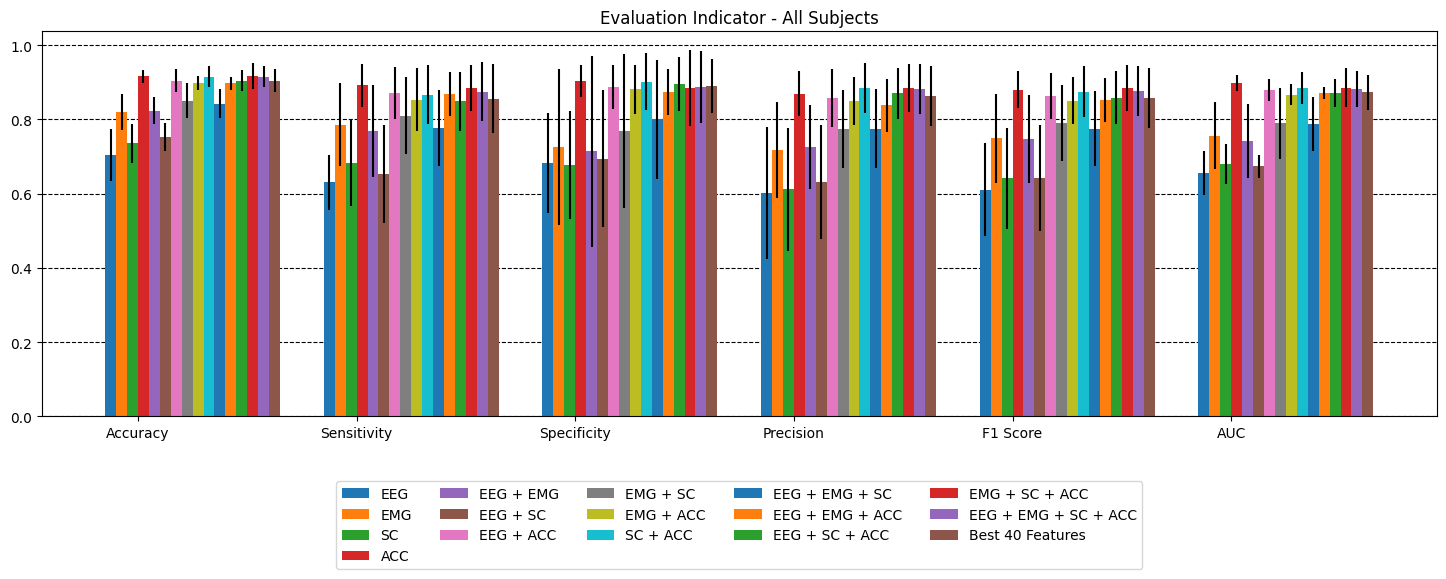

In [8]:
plot(list_of_subjects[0])
plot(list_of_subjects[1])
plot(list_of_subjects[2])
plot(list_of_subjects[3])
plot_list_of_subjects(list_of_subjects)